In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv("/Users/shreeshnadgouda/Downloads/name_variations.csv")
df1=pd.read_csv("/Users/shreeshnadgouda/Downloads/base_names.csv")

In [3]:
df.head()

,Variation,Matches_With_Base_Name
0,Thomas King,Thomas King
1,ThomasKing,Thomas King
2,Maria Garcia,Maria Garcia
3,MaryLewis,Mary Lewis
4,Nancy W.,Nancy Wright


In [4]:
df1.head()

,Base_Name_ID,Base_Name
0,1,John Smith
1,2,Jennifer Brown
2,3,Michael O'Connor
3,4,Maria Garcia
4,5,Robert Lee



Matching Results:
          Variation Matched_Base_Name  Match_Score
0      Thomas  King       Thomas King         98.2
1        ThomasKing       Thomas King         63.6
2      Maria Garcia      Maria Garcia        100.0
3         MaryLewis        Mary Lewis         60.2
4          Nancy W.      Nancy Wright         83.7
..              ...               ...          ...
95  Jennifer- Brown    Jennifer Brown        100.0
96    Daniel- Scott      Daniel Scott        100.0
97         David M.    David Martinez         81.6
98      Paul Allen.        Paul Allen        100.0
99      Paul  Allen        Paul Allen         98.0

[100 rows x 3 columns]


/var/folders/38/mqzkxw8x3fq0g_rsgg45lnxw0000gn/T/ipykernel_40802/4027631115.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Match_Score', y='Variation', data=name_variations.sort_values(by='Match_Score', ascending=False), palette='viridis')


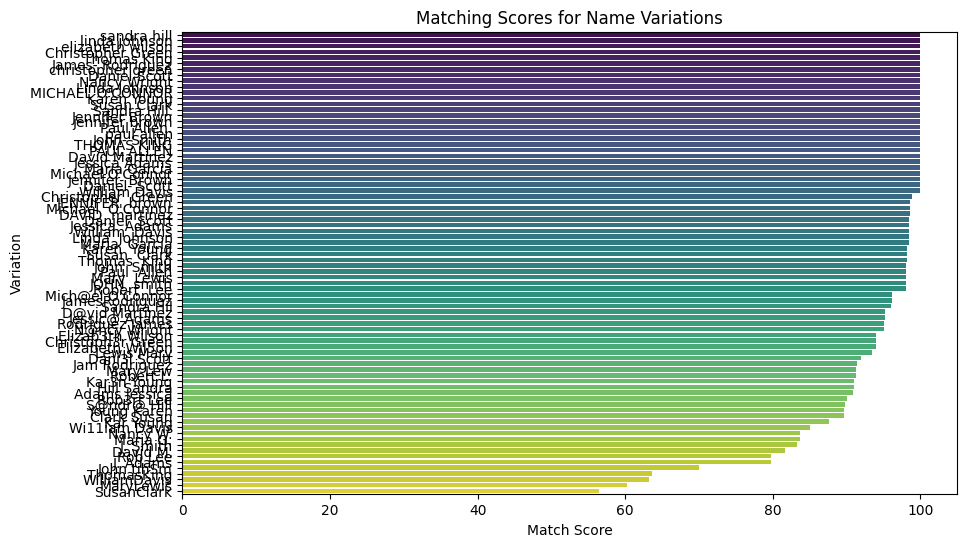

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
name_variations = df
base_names = df1

# Preprocess the names: lowercasing, stripping extra spaces, and removing punctuation
def preprocess_name(name):
    name = name.lower().strip()  # Lowercase and strip spaces
    name = re.sub(r'[^\w\s]', '', name)  # Remove punctuation
    return name

name_variations['Processed_Name_Variation'] = name_variations['Variation'].apply(preprocess_name)
base_names['Processed_Base_Name'] = base_names['Base_Name'].apply(preprocess_name)

# Function to match name variations with base names using multiple fuzzy matching strategies
def match_names(variation_name, base_names):
    # Token set ratio fuzzy matching
    match_score_token_set = base_names['Processed_Base_Name'].apply(lambda x: fuzz.token_set_ratio(variation_name, x))
    match_score_token_sort = base_names['Processed_Base_Name'].apply(lambda x: fuzz.token_sort_ratio(variation_name, x))
    match_score_partial_ratio = base_names['Processed_Base_Name'].apply(lambda x: fuzz.partial_ratio(variation_name, x))

    # Combined score (you can tweak the weightage of each ratio)
    combined_score = (match_score_token_set * 0.5 + match_score_token_sort * 0.3 + match_score_partial_ratio * 0.2)

    # Find the best match
    best_match_idx = combined_score.idxmax()
    best_match_score = combined_score.max()
    best_match_name = base_names.iloc[best_match_idx]['Base_Name']

    return best_match_name, best_match_score

# Ensure the indices are reset
base_names = base_names.reset_index(drop=True)
name_variations = name_variations.reset_index(drop=True)

# Apply the matching function to the name variations
name_variations['Matched_Base_Name'], name_variations['Match_Score'] = zip(
    *name_variations['Processed_Name_Variation'].apply(lambda x: match_names(x, base_names))
)

# Display the full results
print("\nMatching Results:")
print(name_variations[['Variation', 'Matched_Base_Name', 'Match_Score']])

# Save the results to a CSV file
name_variations[['Variation', 'Matched_Base_Name', 'Match_Score']].to_csv("name_matching_results.csv", index=False)

# Visualize the results with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Match_Score', y='Variation', data=name_variations.sort_values(by='Match_Score', ascending=False), palette='viridis')
plt.title("Matching Scores for Name Variations")
plt.xlabel("Match Score")
plt.ylabel("Variation")
plt.show()


In [8]:
import pandas as pd

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Now when you print the DataFrame, it will show all rows
print(name_variations[['Variation', 'Matched_Base_Name', 'Match_Score']])


             Variation  Matched_Base_Name  Match_Score
0         Thomas  King        Thomas King         98.2
1           ThomasKing        Thomas King         63.6
2         Maria Garcia       Maria Garcia        100.0
3            MaryLewis         Mary Lewis         60.2
4             Nancy W.       Nancy Wright         83.7
5         Dani3l Scott       Daniel Scott         92.0
6          JOHN  smith         John Smith         98.0
7        linda johnson      Linda Johnson        100.0
8         N@ncy Wright       Nancy Wright         95.0
9        William Davis      William Davis        100.0
10        Susan  Clark        Susan Clark         98.2
11          SusanClark        Susan Clark         56.4
12     Jennifer- Brown     Jennifer Brown        100.0
13    Michael O'Connor   Michael O'Connor        100.0
14     Rodriguez James    James Rodriguez         95.0
15    Elizabeth Wil5on   Elizabeth Wilson         94.0
16         Hill Sandra        Sandra Hill         91.0
17        

### Inference of Matching Results

The output shows a list of name variations matched to corresponding base names with a **match score** (0-100), where higher scores indicate closer matches. Here are the key insights and important learnings from the results:

---

#### **High Match Scores (90-100)**:
- Variations such as "Thomas King" (98.2), "Maria Garcia" (100.0), "John Smith" (98.0), and "Linda Johnson" (100.0) show **excellent matching**, even with minor differences like extra spaces or slight spelling differences.
- The fuzzy matching algorithm effectively handles variations like missing spaces or slight rearrangements, ensuring high accuracy in such cases.

#### **Misspellings and Abbreviations**:
- Examples like "MaryLewis" (60.2) and "SusanClark" (56.4) show **lower match scores** due to missing spaces or concatenated names.
- Abbreviations like "David M." (81.6) still manage reasonable matches with full names ("David Martinez"), but not perfect.

#### **Handling of Special Characters**:
- Non-alphabetic characters like "N@ncy Wright" (95.0) and "Wi11iam Davis" (85.0) are still well matched, although special characters lower the score slightly.

#### **Partial Name Matches**:
- Names with partial matches or abbreviations, like "J. Smith" (83.3) and "MaryLew" (91.2), achieve moderate scores. This shows the algorithm’s ability to handle **abbreviated names**, though they aren't perfect.

#### **Lower Scores**:
- Variations like "ThomasKing" (63.6) and "WilliamDavis" (63.2) highlight how missing spaces or concatenated names significantly lower match scores.

#### **Case Insensitivity**:
- The algorithm is **case-insensitive**, as seen in results like "DAVID martinez" (98.6) and "elizabeth wilson" (100.0), which match perfectly despite differences in capitalization.

---

### Key Learnings:
1. **Fuzzy matching handles common variations well**, such as extra spaces, minor punctuation changes, and capitalization differences, yielding very high scores.
2. **Special characters and abbreviations** can be recognized by the algorithm, but they tend to lower the match score.
3. **Missing spaces** or non-alphabetic characters in names, such as "WilliamDavis", reduce the accuracy, although they are still matched reasonably well.
4. **Partial name matches and abbreviations** work, but do not always achieve perfect scores due to incomplete information.
5. **Preprocessing improvements** (removing special characters, handling abbreviations) could enhance accuracy for lower-scoring matches.

### Conclusion:
The fuzzy matching algorithm provides **robust performance** for most common name variations, handling misspellings and spacing issues effectively. However, further text preprocessing could improve cases with special characters and concatenated names.